In [1]:
import pandas
import numpy as np


In [2]:
Accept_2017=pandas.read_excel('./acceptrejectPaperDetails_2017.xlsx',sheetname="Accept");
Reject_2017=pandas.read_excel('./acceptrejectPaperDetails_2017.xlsx',sheetname="Reject");
Scores_2017=pandas.read_excel('./acceptrejectPaperDetails_2017.xlsx',sheetname="Scores");

In [173]:
Accept_2017.head()

,Submission ID,Unnamed: 1,Title,Abstract
0,2,NaN,Factors Affecting the Intelligibility of Low-p...,Frequency compression is an effective alternat...
1,4,NaN,Phonetic Restoration of Temporally Reversed Sp...,Early study showed that temporally reversed sp...
2,7,NaN,Cross-linguistic Distinctions between Professi...,This work investigates acoustic and perceptua...
3,9,NaN,A comparison of Danish listeners’ processing c...,The present study used a sentence verification...
4,15,NaN,A new cosine series antialiasing function and ...,We formulated and implemented a procedure to g...


In [3]:
Accept_2017.drop(['Unnamed: 1'],axis=1,inplace=True)
Accept_2017["result"]=pandas.Series(np.zeros(len(Accept_2017),dtype=int)) 
Accept_2017["mean"]=pandas.Series(np.zeros(len(Accept_2017),dtype=float)) 
Accept_2017.info()
Reject_2017.drop(['Unnamed: 1'],axis=1,inplace=True)
Reject_2017["result"]=pandas.Series(np.ones(len(Reject_2017),dtype=int)) 
Reject_2017["mean"]=pandas.Series(np.zeros(len(Reject_2017),dtype=float)) 
Reject_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 5 columns):
Submission ID    794 non-null int64
Title            794 non-null object
Abstract         793 non-null object
result           794 non-null int64
mean             794 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 31.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 5 columns):
Submission ID    677 non-null int64
Title            677 non-null object
Abstract         677 non-null object
result           677 non-null int64
mean             677 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 26.5+ KB


In [4]:
result_rej = pandas.merge(Scores_2017,Reject_2017[['Submission ID','Title','Abstract','result','mean']]
                 ,on='Submission ID')
result_acc = pandas.merge(Scores_2017,Accept_2017[['Submission ID','Title','Abstract','result','mean']]
                 ,on='Submission ID')


In [5]:
result_2017 = result_acc.append(result_rej, ignore_index=True)

In [6]:
def text_toscore(temp):
    temp = temp.split()
    score = [float(i) for i in temp]
    m = np.mean(score)
    s = np.std(score)
    return score,m,s
#Reject_2017.head()
for i in result_2017.index:
    #print(i)
    temp = result_2017.iloc[i]["Scores"]
    #print(temp)
    score,m,s = text_toscore(temp) 
    #print(m)
    result_2017.at[i, 'mean'] = m
    


In [7]:
#type(result_2017.sort_values[])
result_2017 = result_2017.fillna("")
data = result_2017.sort_values(by=['mean'])
data.tail()

,Submission ID,Scores,Title,Abstract,result,mean
641,1409,4.95 5.65 5.70 6,What do babies hear? Analyses of child- and ad...,Child-directed speech is argued to facilitate ...,0,5.5750
664,1452,5.05 5.60 5.95 6,Tacotron: Towards End-To-End Speech Synthesis,A text-to-speech synthesis system typically co...,0,5.6500
65,137,5.15 5.80 5.80 5.85,A Generative Model for Score Normalization in ...,We propose a theoretical framework for thinkin...,0,5.6500
500,1111,4.90 5.80 6 6,The ASVspoof 2017 Challenge: Assessing the Lim...,The ASVspoof initiative was created to promote...,0,5.6750
780,1746,5.05 5.90 6 6,"Effects of Talker Dialect, Gender & Race Diffe...",This project compares the accuracy of two auto...,0,5.7375


In [117]:
reject = result_rej.values.tolist()
accept = result_acc.values.tolist()


In [194]:
result_2017 = result_acc.append(result_rej, ignore_index=True)
temp = result_2017.iloc[1467]["Scores"]
temp = temp.split()
print([float(i) for i in temp])
np.mean([float(i) for i in temp])

[2.15, 3.15, 4.95]


3.4166666666666665

In [26]:
data_2017 = result_2017.to_dict()

In [45]:
test = data_2017['Submission ID']


KeyError: ('Submission ID', 'Scores')

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

/home/valliappan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_b17bg2cr.c:4:19: fatal error: cudnn.h: No such file or directory\ncompilation terminated.\n'
Mapped name None to device cuda: GeForce GTX 1050 Ti (0000:01:00.0)


In [50]:
X=result_2017.Abstract
Y=result_2017.result
len(Y)

1471

In [118]:
i =[]
i = reject[0]
i.append(0)
i.append([float(num) for num in i[1].split()])
i.append(np.mean(i[5]))
i.append(np.std(i[5]))
i

[1,
 '2.40    3.35    5    5.45    ',
 'The Effects of Sonority and Preceding Vowels on the Distribution of Singleton/Geminate Consonants in Spoken Japanese',
 'By studying the Corpus of Spontaneous Japanese (hereafter CSJ) [1], this\nproject offers new findings concerning patterns in the distribution of\nsingleton and geminate consonants in spontaneous speech. In particular, the\ncurrent study reports on the details of the distribution of singletons and\ngeminates in actual speech. It also examines the effect of the segmental\nproperties of singletons and geminates, such as manner of articulation, and the\neffect of preceding vowels.\nThe current study brought forth the following findings that would be difficult\nto observe by other approaches, such as traditional (i.e., intuition-based and\ndictionary-based) studies and perception experiments. The patterns in the\ndistribution and phonetic properties of singletons and geminates greatly differ\naccording to place, manner, and voicing.

In [131]:
list = []
list_2 = []
le = LabelEncoder()
dictionary = {}
for i in accept:
    j = []
    i.append(1)
    i.append([float(num) for num in i[1].split()])
    i.append(np.mean(i[5]))
    i.append(np.std(i[5]))
    list.append(i)
    j.append(i[0])
    j.append(i[4])
    j.append(i[5])
    j.append(i[6])
    j.append(i[7])
    
    list_2.append(j)
    #line = [float(num) for num in i[1].split()]
for i in reject:
    j=[]
    i.append(0)
    i.append([float(num) for num in i[1].split()])
    i.append(np.mean(i[5]))
    i.append(np.std(i[5]))
    list.append(i)
    j.append(i[0])
    j.append(i[4])
    j.append(i[5])
    j.append(i[6])
    j.append(i[7])
    list_2.append(j)

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)


In [55]:
max_words = 4000
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [49]:
result_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 6 columns):
Submission ID    1471 non-null int64
Scores           1471 non-null object
Title            1471 non-null object
Abstract         1471 non-null object
result           1471 non-null int64
mean             1471 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 69.0+ KB


In [56]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [57]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 50)           200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [60]:
tok.fit_on_texts(X_test)
sequences_test = tok.texts_to_sequences(X_test)
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)

In [62]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=100,validation_data=(sequences_matrix_test,Y_test))

Train on 1250 samples, validate on 221 samples
Epoch 1/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0217 - acc: 0.9968 - val_loss: 2.5563 - val_acc: 0.4751
Epoch 2/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0061 - acc: 1.0000 - val_loss: 2.6520 - val_acc: 0.4932
Epoch 3/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 2.9194 - val_acc: 0.4887
Epoch 4/100
1250/1250 [==============================] - 2s 1ms/step - loss: 7.8005e-04 - acc: 1.0000 - val_loss: 3.1296 - val_acc: 0.4932
Epoch 5/100
1250/1250 [==============================] - 2s 1ms/step - loss: 4.2496e-04 - acc: 1.0000 - val_loss: 3.2532 - val_acc: 0.5204
Epoch 6/100
1250/1250 [==============================] - 2s 1ms/step - loss: 2.1876e-04 - acc: 1.0000 - val_loss: 3.5539 - val_acc: 0.5204
Epoch 7/100
1250/1250 [==============================] - 2s 1ms/step - loss: 9.0757e-05 - acc: 1.0000 - val_loss: 3.9481 - val_acc:

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_new = vectorizer.fit_transform(X)

In [65]:
X_new.shape

(1471, 10687)

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,test_size=0.15)

model = RNN()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=100,validation_data=(sequences_matrix_test,Y_test))

Train on 1250 samples, validate on 221 samples
Epoch 1/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6920 - acc: 0.5320 - val_loss: 0.6880 - val_acc: 0.5566
Epoch 2/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.7006 - acc: 0.5368 - val_loss: 0.6885 - val_acc: 0.5566
Epoch 3/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6739 - acc: 0.5544 - val_loss: 0.6886 - val_acc: 0.5566
Epoch 4/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6357 - acc: 0.7520 - val_loss: 0.6893 - val_acc: 0.5385
Epoch 5/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.5850 - acc: 0.7640 - val_loss: 0.7227 - val_acc: 0.5068
Epoch 6/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.4526 - acc: 0.8808 - val_loss: 0.7508 - val_acc: 0.5204
Epoch 7/100
1250/1250 [==============================] - 2s 1ms/step - loss: 0.3293 - acc: 0.9040 - val_loss: 0.8747 - val_acc: 0.5520
Epoch 8/

Epoch 60/100
1250/1250 [==============================] - 2s 2ms/step - loss: 7.0930e-07 - acc: 1.0000 - val_loss: 5.8049 - val_acc: 0.5023
Epoch 61/100
1250/1250 [==============================] - 2s 1ms/step - loss: 5.5399e-07 - acc: 1.0000 - val_loss: 5.8109 - val_acc: 0.5023
Epoch 62/100
1250/1250 [==============================] - 2s 1ms/step - loss: 3.9803e-07 - acc: 1.0000 - val_loss: 5.8171 - val_acc: 0.4977
Epoch 63/100
1250/1250 [==============================] - 2s 1ms/step - loss: 3.3224e-07 - acc: 1.0000 - val_loss: 5.8353 - val_acc: 0.4977
Epoch 64/100
1250/1250 [==============================] - 2s 1ms/step - loss: 3.4623e-07 - acc: 1.0000 - val_loss: 5.8480 - val_acc: 0.4932
Epoch 65/100
1250/1250 [==============================] - 2s 1ms/step - loss: 2.8576e-07 - acc: 1.0000 - val_loss: 5.8602 - val_acc: 0.4932
Epoch 66/100
1250/1250 [==============================] - 2s 1ms/step - loss: 2.5690e-07 - acc: 1.0000 - val_loss: 5.8780 - val_acc: 0.4977
Epoch 67/100
1250/12

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



# max_df
vect = TfidfVectorizer(max_df=100).fit(X)
print('Vocabulary len:', len(vect.get_feature_names()))
print('Longest word:', max(vect.vocabulary_, key=len))

Vocabulary len: 10447
Longest word: methylenedioxymethamphetamine


In [104]:
X_vect = vect.transform(X)

In [105]:
X_vect.shape

(1471, 10447)

In [106]:
X_train,X_test,Y_train,Y_test = train_test_split(X_vect,Y,test_size=0.15)

In [107]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.1)
model.fit(X_train, Y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [108]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(Y_test, y_pred) * 100))

Accuracy: 61.09%


In [113]:
vect = CountVectorizer(min_df=5, ngram_range=(2, 5), analyzer='char_wb').fit(X)
X_vect = vect.transform(X)

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [114]:
clf_svm = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf_svm,X_vect,Y, cv=5)
print(np.mean(scores))

0.562209461791311


In [8]:
X = result_2017.Scores
Y = result_2017.result

In [ ]:
X_new = np.zeros((len(X),11))
count = 0
addon = 0

for i in X:
    
    X_new[count,addon+0] = i[i.nonzero()].mean()
    X_new[count,addon+1] = i[i.nonzero()].std()
    temp = np.ptp(i[i.nonzero()])
    if(temp == 0):
        X_new[count,addon+2] = np.max(X_new[:,addon+2])
    else:
        X_new[count,addon+2] = X_new[count,addon+0]*(1.0/(temp+0.00001))
    a = i
    X_new[count,addon+3] = np.sum(np.logical_and(a>0.1, a<=1))
    X_new[count,addon+4] = np.sum(np.logical_and(a>1, a<=2))
    X_new[count,addon+5] = np.sum(np.logical_and(a>2, a<=3))
    X_new[count,addon+6] = np.sum(np.logical_and(a>3, a<=4))
    X_new[count,addon+7] = np.sum(np.logical_and(a>4, a<=5))
    X_new[count,addon+8] = np.sum(np.logical_and(a>5, a<=6))
    X_new[count,addon+9] = np.max(i[i.nonzero()])
    X_new[count,addon+10] = np.min(i[i.nonzero()])
    count +=1


In [10]:
def text_toscore(temp):
    temp = temp.split()
    score = [float(i) for i in temp]
    #m = np.mean(score)
    #s = np.std(score)
    return score#,m,s

for i in X:
    #print(i)
    temp = result_2017.iloc[i]["Scores"]
    #print(temp)
    score,m,s = text_toscore(temp) 
    #print(m)
    result_2017.at[i, 'mean'] = m

'4    4.15    4.65    4.85    '

In [ ]:
    if line:
        line = [float(i) for i in line]
        polyShape.append(line)


    X = np.zeros((len(polyShape),6))
    count = 0
    for i in polyShape:
        temp=np.array(i)
        #print(len(temp))
        X[count,0:len(temp)] = temp[0:len(temp)]
        count +=1   

In [13]:
def text_toscore(temp):
    temp = temp.split()
    score = [float(i) for i in temp]
    #m = np.mean(score)
    #s = np.std(score)
    return score#,m,s

X_scores = np.zeros((len(X),6))
count =0
for i in X:
    score = text_toscore(i) 
    X_scores[count,0:len(score)] = score
    count+=1    

In [27]:
Y.shape

(1471,)

In [16]:
X_new = np.zeros((len(X_scores),11))
count = 0
addon = 0

for i in X_scores:
    
    X_new[count,addon+0] = i[i.nonzero()].mean()
    X_new[count,addon+1] = i[i.nonzero()].std()
    temp = np.ptp(i[i.nonzero()])
    if(temp == 0):
        X_new[count,addon+2] = np.max(X_new[:,addon+2])
    else:
        X_new[count,addon+2] = X_new[count,addon+0]*(1.0/(temp+0.00001))
    a = i
    X_new[count,addon+3] = np.sum(np.logical_and(a>0.1, a<=1))
    X_new[count,addon+4] = np.sum(np.logical_and(a>1, a<=2))
    X_new[count,addon+5] = np.sum(np.logical_and(a>2, a<=3))
    X_new[count,addon+6] = np.sum(np.logical_and(a>3, a<=4))
    X_new[count,addon+7] = np.sum(np.logical_and(a>4, a<=5))
    X_new[count,addon+8] = np.sum(np.logical_and(a>5, a<=6))
    X_new[count,addon+9] = np.max(i[i.nonzero()])
    X_new[count,addon+10] = np.min(i[i.nonzero()])
    count +=1


In [22]:
import util
X_accepted = util.read_textfile('acceptscores.txt')
X_rejection =  util.read_textfile('rejectscores.txt')
Y_accepted = np.zeros((len(X_accepted),))
Y_rejection = np.ones((len(X_rejection),))

X_2018 = np.vstack((X_accepted,X_rejection))
Y_2018 = np.hstack((Y_accepted,Y_rejection))

In [23]:
Y_2018.shape

(1331,)

In [24]:
X_2018.shape

(1331, 6)

In [25]:
X_new_2018 = np.zeros((len(X_2018),11))
count = 0
addon = 0

for i in X_2018:
    
    X_new[count,addon+0] = i[i.nonzero()].mean()
    X_new[count,addon+1] = i[i.nonzero()].std()
    temp = np.ptp(i[i.nonzero()])
    if(temp == 0):
        X_new[count,addon+2] = np.max(X_new[:,addon+2])
    else:
        X_new[count,addon+2] = X_new[count,addon+0]*(1.0/(temp+0.00001))
    a = i
    X_new[count,addon+3] = np.sum(np.logical_and(a>0.1, a<=1))
    X_new[count,addon+4] = np.sum(np.logical_and(a>1, a<=2))
    X_new[count,addon+5] = np.sum(np.logical_and(a>2, a<=3))
    X_new[count,addon+6] = np.sum(np.logical_and(a>3, a<=4))
    X_new[count,addon+7] = np.sum(np.logical_and(a>4, a<=5))
    X_new[count,addon+8] = np.sum(np.logical_and(a>5, a<=6))
    X_new[count,addon+9] = np.max(i[i.nonzero()])
    X_new[count,addon+10] = np.min(i[i.nonzero()])
    count +=1


In [26]:
X_new_2018.shape

(1331, 11)

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200,n_jobs=-1)
clf.fit(X_new[:,0:2],Y)
clf.score(X_new_2018[:,0:2], Y_2018)

0.43726521412471825

In [39]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear', C=1)
clf_svm.fit(X_new,Y.T)
y_pred=clf_svm.predict(X_new_2018)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_2018, y_pred)

array([[  0, 749],
       [  0, 582]])

In [32]:
sum(Y_2018)/len(Y_2018)

0.43726521412471825

In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=45)
clf_neigh.fit(X_new,np.ravel(Y))
clf_neigh.score(X_new_2018, Y_2018)


0.43726521412471825

In [51]:
# reading 2017 scores
Accept_2018=pandas.read_excel('./acceptedPaperDetails_2018.xlsx');
Reject_2018=pandas.read_excel('./rejectPaperDetails_2018.xlsx');

Accept_2018.head()
# Reject_2018.head()    

,Submission ID,Scores,Title,Abstract
0,27,3.15 4.2 4.65,Binaural Speech Intelligibility Estimation Usi...,We attempted to estimate the speech intelligib...
1,34,5.25 4.95 5.05 4.95,Real-Time Scoring of an Oral Reading Assessmen...,We discuss the real-time scoring logic for a s...
2,38,5.2 4.9 5.15 4.8,Conditional End-to-End Audio Transformations,We present an end-to-end method for transformi...
3,40,2.05 4.7 5.9 5.7,Speech Recognition for Medical Conversations,In this paper we document our experiences with...
4,41,5 4.9 4.75 4.75,Improved Supervised Locality Preserving Projec...,A Supervised Locality Preserving Projection (S...


In [52]:
Accept_2018["result"]=pandas.Series(np.zeros(len(Accept_2018),dtype=float)) 
Accept_2018["mean"]=pandas.Series(np.zeros(len(Accept_2018),dtype=float)) 
Accept_2018.info()
Reject_2018["result"]=pandas.Series(np.ones(len(Reject_2018),dtype=float)) 
Reject_2018["mean"]=pandas.Series(np.zeros(len(Reject_2018),dtype=float)) 
Reject_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 6 columns):
Submission ID    749 non-null int64
Scores           749 non-null object
Title            749 non-null object
Abstract         749 non-null object
result           749 non-null float64
mean             749 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 35.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 6 columns):
Submission ID    582 non-null int64
Scores           582 non-null object
Title            582 non-null object
Abstract         582 non-null object
result           582 non-null float64
mean             582 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 27.4+ KB


In [53]:
data_2018 = Accept_2018.append(Reject_2018, ignore_index=True)
def text_toscore(temp):
    temp = temp.split()
    score = [float(i) for i in temp]
    m = np.mean(score)
    s = np.std(score)
    return score,m,s



In [54]:
for i in data_2018.index:
    #print(i)
    temp = data_2018.iloc[i]["Scores"]
    #print(temp)
    score,m,s = text_toscore(temp) 
    #print(m)
    data_2018.at[i, 'mean'] = m
    
data_2018 = data_2018.fillna("")
Data_2018 = data_2018.sort_values(by=['mean'])
Data_2018.info()
Data_2018.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 1033 to 254
Data columns (total 6 columns):
Submission ID    1331 non-null int64
Scores           1331 non-null object
Title            1331 non-null object
Abstract         1331 non-null object
result           1331 non-null float64
mean             1331 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 72.8+ KB


,Submission ID,Scores,Title,Abstract,result,mean
431,1760,5.85 5.2 5.8,Picture Naming or Word Reading: Does the Modal...,Auditory-motor adaptation and transfer paradig...,0.0,5.616667
12,51,5.9 5.75 5.1 5.9,The INTERSPEECH 2018 Computational Paralinguis...,The INTERSPEECH 2018 Computational Paralinguis...,0.0,5.662500
250,1384,6 5.95 5.8 5,Articulation Rate as a Speaker Discriminant in...,Identifying speech parameters that have both a...,0.0,5.687500
628,2284,5.85 5.6 5.9 5.85,Recognizing Overlapped Speech in Meetings: a M...,The goal of this work is to develop a meeting ...,0.0,5.800000
254,1392,5.75 6 5.9 5.75,Cold Fusion: Training Seq2Seq Models Together ...,Sequence-to-sequence (Seq2Seq) models with att...,0.0,5.850000


In [55]:
Data_2018.to_csv('sorted_2018results.csv')

In [56]:
input_scores_2018=np.zeros((len(Data_2018),6)) 
output_class_2018=np.zeros((len(Data_2018),))
count = 0
for i in range(len(Data_2018)):
    #print(i)
    temp = Data_2018.iloc[i]["Scores"]
    result = Data_2018.iloc[i]["result"]
    #print(temp)
    score,m,s = text_toscore(temp) 
    #print(m)
    input_scores_2018[count,0:len(score)]=score
    output_class_2018[count] = result
    count+=1
    

In [58]:
print(input_scores_2018.shape)
print(output_class_2018.shape)

(1331, 6)
(1331,)


In [61]:
def scores_covertion(X_scores):
    X_new = np.zeros((len(X_scores),11))
    count = 0
    addon = 0
    for i in X_scores:
        
        X_new[count,addon+0] = i[i.nonzero()].mean()/6
        X_new[count,addon+1] = i[i.nonzero()].std()/6
        temp = np.ptp(i[i.nonzero()])
        if(temp == 0):
            X_new[count,addon+2] = np.max(X_new[:,addon+2])
        else:
            X_new[count,addon+2] = 6*X_new[count,addon+0]*(1.0/(temp))
        X_new[count,addon+3] = np.max(i[i.nonzero()])/6
        X_new[count,addon+4] = np.min(i[i.nonzero()])/6
        a = i
        X_new[count,addon+5] = np.sum(np.logical_and(a>0.1, a<=1))
        X_new[count,addon+6] = np.sum(np.logical_and(a>1, a<=2))
        X_new[count,addon+7] = np.sum(np.logical_and(a>2, a<=3))
        X_new[count,addon+8] = np.sum(np.logical_and(a>3, a<=4))
        X_new[count,addon+9] = np.sum(np.logical_and(a>4, a<=5))
        X_new[count,addon+10] = np.sum(np.logical_and(a>5, a<=6))
        
        count +=1
    return X_new

In [76]:
X_2018 = scores_covertion(input_scores_2018)
print(X_2018[1201])
# np.mean(X_2017,axis=0)
mean_2018 = np.mean(X_2018[:,2],axis = 0)
std_2018 = np.std(X_2018[:,2],axis = 0)

[0.83541667 0.11966025 3.1328125  0.96666667 0.7        0.
 0.         0.         0.         2.         2.        ]


In [66]:
input_scores_2018[1201]

array([5.65, 4.2 , 4.4 , 5.8 , 0.  , 0.  ])

In [74]:
X_2018[:,2] = (X_2018[:,2]-mean_2017)/std_2017

NameError: name 'mean_2017' is not defined

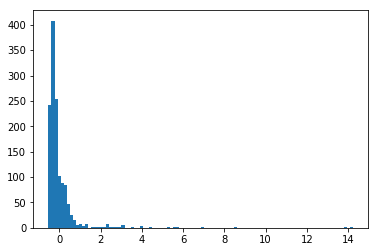

In [75]:
from matplotlib import pyplot as plt
plt.hist(X_2018[:,2], bins=100)
#plt.hist(X_new[750:-1,7], bins=100)
plt.show()

In [73]:
std_2018

5.531499107632811